### Imports

In [61]:
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
%matplotlib inline

### Establish database connection

In [4]:
conn = psycopg2.connect(user = "admin",
                        password = "admin",
                        host = "localhost",
                        port = "5432",
                        database = "fakenews_100k")
cursor = conn.cursor()

### Proof that we have a working database

In [13]:
cursor.execute("SELECT count(*) FROM article")
count = cursor.fetchone()[0]
print "Database contains {} scraped articles".format(count)

Database contains 100000 scraped articles


#### We can associate an article with a label

In [29]:
cursor.execute("SELECT article.article_id, typ.type_name FROM article INNER JOIN typ ON article.type_id = typ.type_id")
res = cursor.fetchmany(10)

In [43]:
print "{:10}\t {:12}".format("article_id", "type_name")
print "------------------------------"
for row in res:
    print "{:10}\t {:>12}".format(row[0], row[1])

article_id	 type_name   
------------------------------
         2	        rumor
         6	         hate
         7	         hate
         8	         hate
         9	         hate
        10	         hate
        11	   unreliable
        13	   unreliable
        14	   unreliable
        15	   unreliable


# Fake News Corpus

## Basic Statistics

### Label Distribution

In [44]:
cursor.execute("select typ.type_name, count(article.type_id) from article inner join typ on typ.type_id = article.type_id group by typ.type_name")
res = cursor.fetchall()

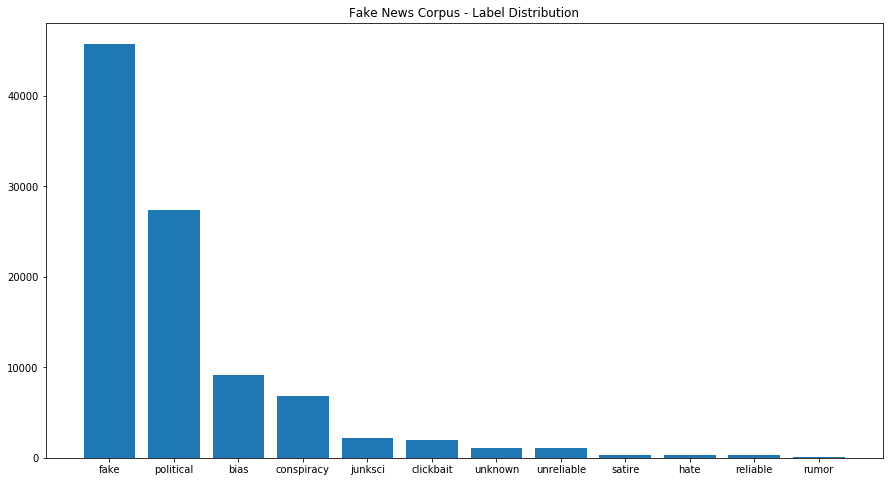

In [68]:
# Time to plot
res = sorted(res, key=lambda x: -x[1])

xs = np.arange(len(res))
ys = [int(t[1]) for t in res]
names = [t[0] for t in res]

fig, ax = plt.subplots(figsize=(15, 8))
plt.bar(xs, ys)
plt.xticks(xs, names)
plt.title("Fake News Corpus - Label Distribution")
plt.show()

I will perform this next exercise, under the assumption that all author names makes sense and are not poorly scraped